### Enron Dataset EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pickle
import random
import math
from sklearn.cross_validation import train_test_split

%matplotlib inline

In [15]:
with open ('final_project_dataset.pkl','rb') as f:
    enron_data = pickle.load(f)

In [18]:
df = pd.DataFrame.from_records(list(enron_data.values()))
persons = pd.Series(list(enron_data.keys()))

df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
1,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
2,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
4,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


In [27]:
df['persons'] = persons

In [28]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
0,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,1740,False,585062,NaN,365788,702,807,1061827,585062,METTS MARK
1,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258,BAXTER JOHN C
2,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735,ELLIOTT STEVEN
3,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,False,386335,NaN,NaN,58,764,NaN,1038185,CORDES WILLIAM R
4,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,11350,True,853064,NaN,243293,1035,1045,288682,6391065,HANNON KEVIN P


In [30]:
df[df['persons']=='ALLEN PHILLIP K']

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,persons
109,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,152,False,126027,-126027,201955,1407,2902,4484442,1729541,ALLEN PHILLIP K


Let's see what is the distribution of poi is like in the dataset

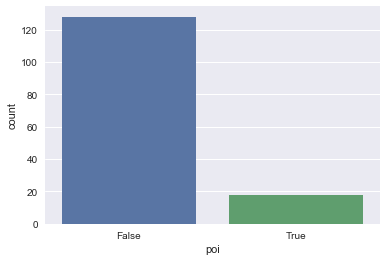

In [32]:
sns.countplot(data = df,x = "poi")

We can see that most of the poi's are really less compared to non poi data points

Analysing the relation between salary/bonus and poi

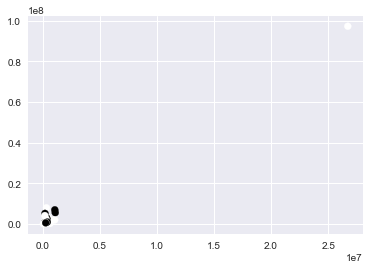

In [38]:
sns.set_style("darkgrid")
plt.plot(x = df['salary'],y=df['bonus'],c = df['poi'])

^^ There is calealy an outlier, Let's remove that

In [52]:
df['salary'].count()

146

In [53]:
df['salary'].describe()

count     146
unique     95
top       NaN
freq       51
Name: salary, dtype: object